In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


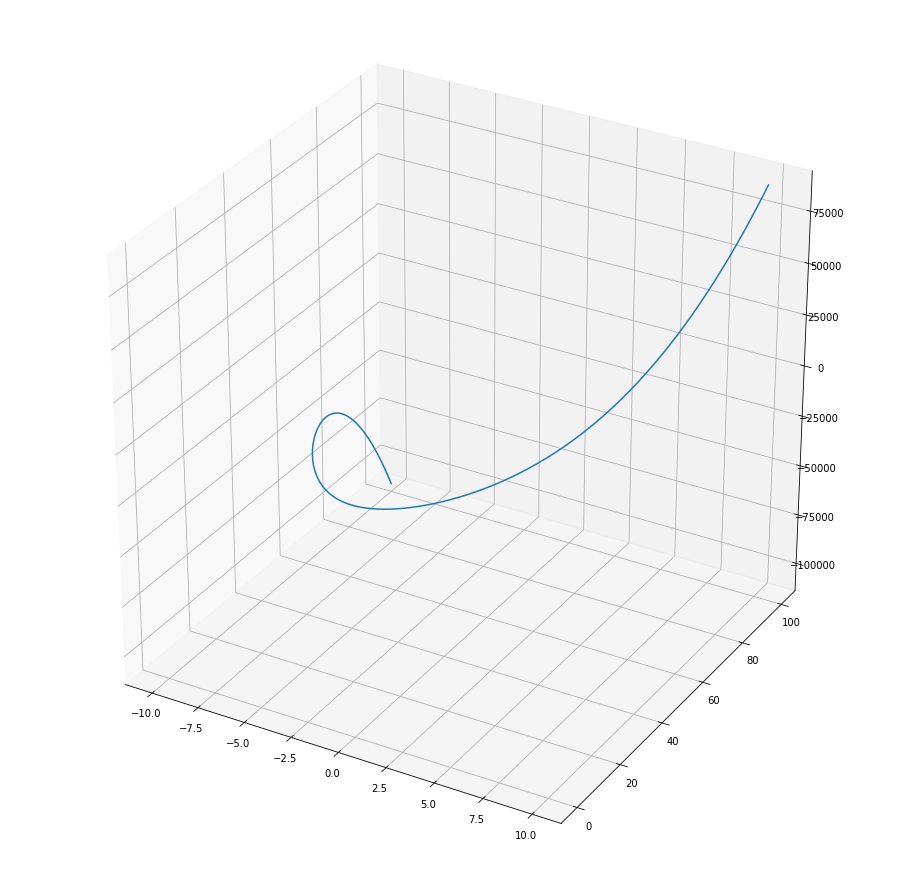

In [95]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(16, 16))
ax = fig.add_subplot('111', projection='3d')

size=500

t = linspace(-10, 10, size)
x = t
y = t**2
z = t**5 - t**4

ax.plot(x, y, z)

In [5]:
import sys

sys.path.append('..')

In [6]:
from egsgp import EGSGP
from util import *

In [7]:
X = vstack((x, y)).T.astype('object')
t = z.reshape(-1, 1).astype('object')

print(X.shape, t.shape, X.dtype, t.dtype)
input_vars = [f'x{i}' for i in range(X.shape[1])]

(500, 2) (500, 1) object object


In [8]:
input_vars = [f'x{i}' for i in range(X.shape[1])]

In [9]:
sim = EGSGP(0.1, input_vars=input_vars, max_depth=5, operators=default_operators, pop_size=500, max_fitness=1e50)

In [10]:
from tqdm import trange
bests, avgs = [], []
for i in trange(20):
    b, a = sim.run(X, t, 100)
    bests.append(b)
    avgs.append(a)

G: 92. M: 3027, A: 3392, BE: 3006:  93%|█████████▎| 93/100 [06:08<00:27,  3.93s/it]


G: 86. M: 1737, A: 2082, BE: 1607:  86%|████████▌ | 86/100 [04:34<00:46,  3.31s/it]


G: 79. M: 1545, A: 1640, BE: 1469:  79%|███████▉  | 79/100 [04:22<01:06,  3.16s/it]


G: 72. M: 1287, A: 4797, BE: 1249:  73%|███████▎  | 73/100 [05:19<01:43,  3.85s/it]


G: 65. M: 1640, A: 1869, BE: 1197:  66%|██████▌   | 66/100 [04:06<02:33,  4.52s/it]


G: 58. M: 4878, A: 6118, BE: 2668:  59%|█████▉    | 59/100 [03:44<02:20,  3.43s/it]


G: 52. M: 2042, A: 3828, BE: 280:  53%|█████▎    | 53/100 [03:58<03:14,  4.14s/it]


G: 45. M: 3310, A: 9603, BE: 3310:  46%|████▌     | 46/100 [03:01<02:49,  3.14s/it]


G: 38. M: 3065, A: 3563, BE: 2311:  39%|███▉      | 39/100 [02:31<03:59,  3.93s/it]


G: 32. M: 559, A: 3198, BE: 559:  32%|███▏      | 32/100 [02:34<05:17,  4.67s/it] 


G: 27. M: 8622, A: 10048, BE: 3613:  27%|██▋       | 27/100 [01:59<04:28,  3.68s/it]


G: 20. M: 2203, A: 11848, BE: 2203:  20%|██        | 20/100 [02:09<07:56,  5.96s/it]


G: 13. M: 7639, A: 13292, BE: 934:  13%|█▎        | 13/100 [01:30<10:35,  7.31s/it]


G: 7. M: 11757, A: 16728, BE: 10138:   7%|▋         | 7/100 [00:52<10:40,  6.89s/it]


G: 0. M: 15729, A: 17157, BE: 15729:   0%|          | 0/100 [00:01<?, ?it/s]


G: 93. M: 975, A: 1142, BE: 952:  94%|█████████▍| 94/100 [07:47<00:23,  3.85s/it]


G: 86. M: 2670, A: 3635, BE: 2640:  87%|████████▋ | 87/100 [05:44<00:52,  4.07s/it]


G: 79. M: 2133, A: 2607, BE: 1887:  80%|████████  | 80/100 [05:11<01:27,  4.38s/it]


G: 72. M: 4321, A: 5098, BE: 2357:  72%|███████▏  | 72/100 [05:06<01:47,  3.85s/it]


G: 65. M: 1594, A: 2373, BE: 961:  65%|██████▌   | 65/100 [04:16<02:40,  4.59s/it] 


G: 58. M: 1411, A: 2266, BE: 1178:  59%|█████▉    | 59/100 [03:40<01:54,  2.80s/it]


100%|██████████| 20/20 [2:23:44<00:00, 399.01s/it] 100/100 [05:35<00:00,  2.84s/it]


In [11]:
abests = array(bests)[:, 0, ]

In [12]:
aavgs = array(avgs)[:, 0, :]

In [13]:
abests.shape, aavgs.shape

((20, 100), (20, 100))

In [14]:
save('abests', abests)
save('aavgs', aavgs)

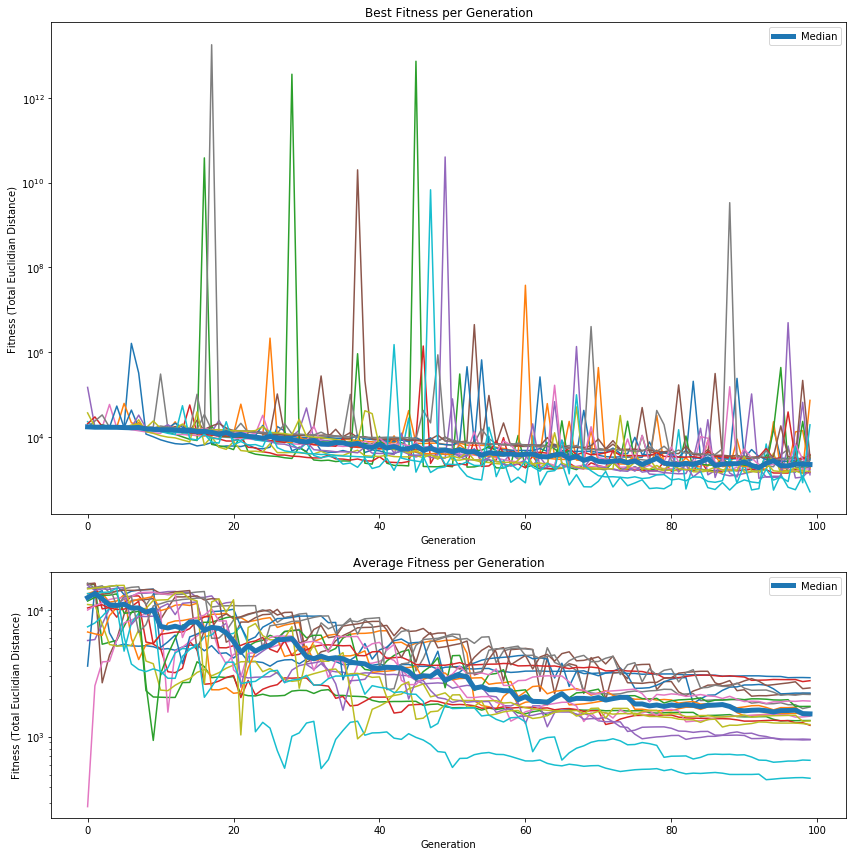

In [15]:
f, (a1, a2) = subplots(2, 1, figsize=(12, 12), gridspec_kw = {'height_ratios':[2, 1]})

for line in abests:
    a1.plot(line)

a1.set_title('Best Fitness per Generation')
a1.plot(median(abests, axis=0), label='Median', linewidth=5)
a1.set_yscale('log')
a1.set_ylabel('Fitness (Total Euclidian Distance)')
a1.set_xlabel('Generation')
a1.legend()

for line in aavgs:
    a2.plot(line)
    
a2.set_title('Average Fitness per Generation')
a2.plot(median(aavgs, axis=0), label='Median', linewidth=5)
a2.set_yscale('log')
a2.set_ylabel('Fitness (Total Euclidian Distance)')
a2.set_xlabel('Generation')
a2.legend()
f.tight_layout()

savefig('best_avg_fitness_generation.png')

In [16]:
y = sim.predict(X)

In [17]:
y = array(y)
print(y.shape, X.shape)

(500, 1) (500, 2)


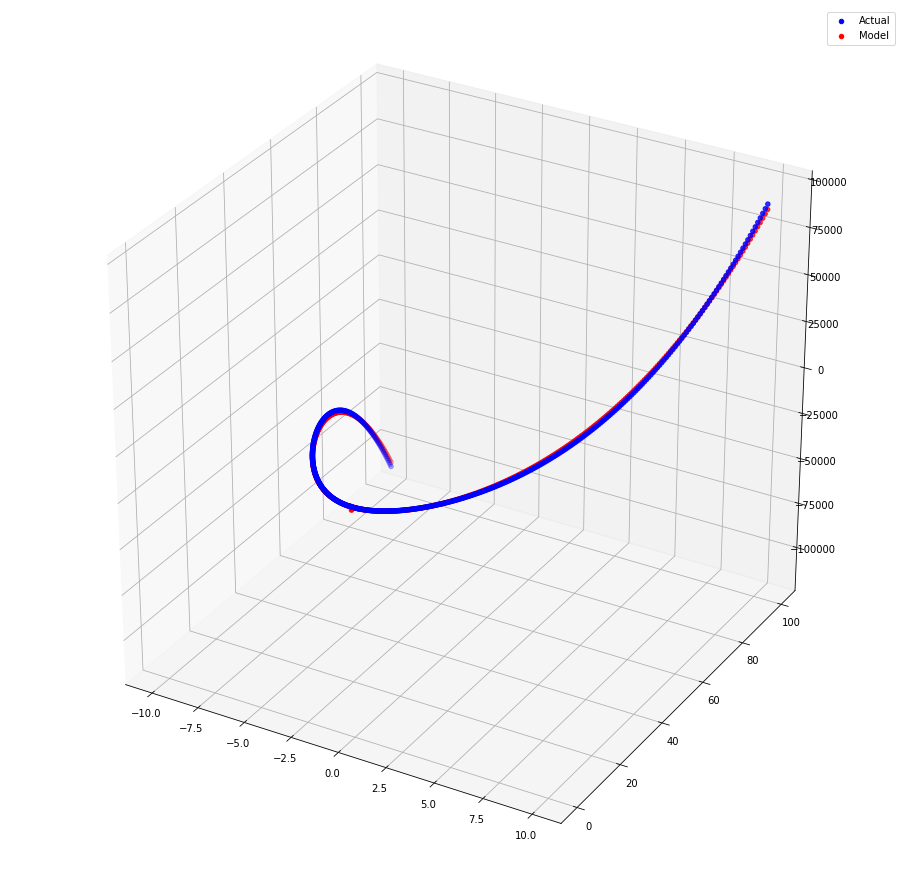

In [18]:
fig = figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(X[:, 0], X[:, 1], t[:, 0], c='blue', label='Actual')
ax.scatter(X[:, 0], X[:, 1], y[:, 0], c='red', label='Model')
legend()

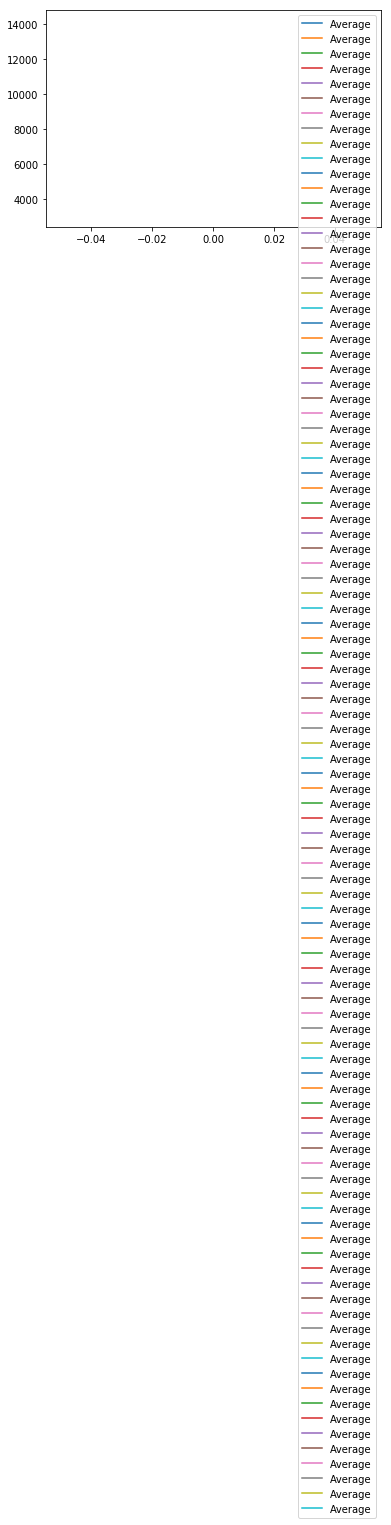

In [19]:
plot(avgs[0], label='Average')
legend()

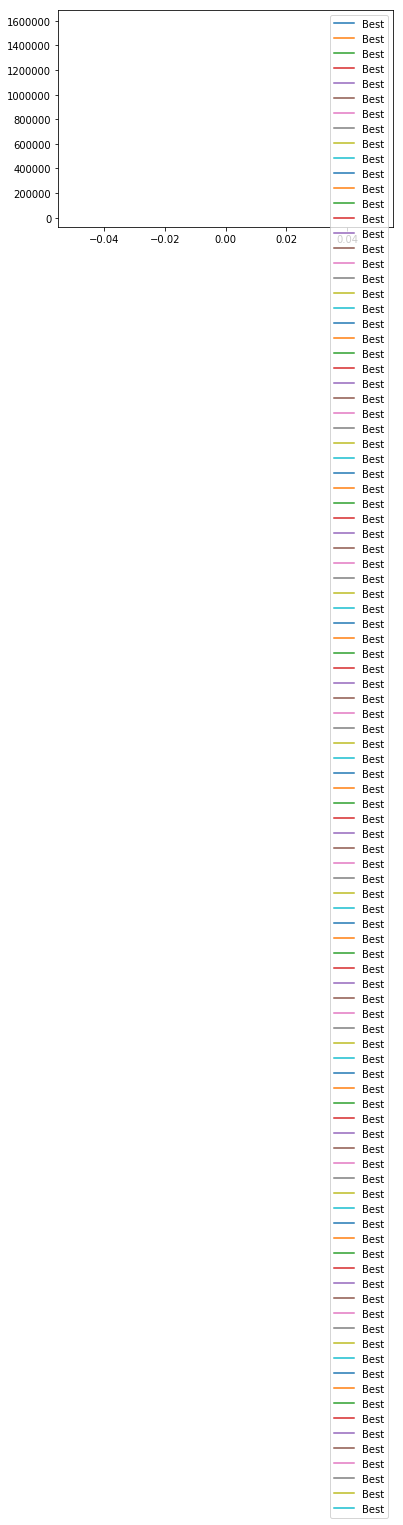

In [20]:
plot(bests[0], label='Best')
legend()

In [21]:
len(bests), len(avgs)

(20, 20)

In [96]:
x.shape, y.shape, z.shape

((500,), (500,), (500,))

In [97]:
t = vstack((y, z)).T.astype('object')
X = x.reshape(-1, 1).astype('object')

print(X.shape, t.shape, X.dtype, t.dtype)

(500, 1) (500, 2) object object


In [98]:
input_vars = [f'x{i}' for i in range(X.shape[1])]

sim = EGSGP(0.1, input_vars=input_vars, max_depth=5, operators=default_operators, pop_size=500, max_fitness=1e50)

In [ ]:
from tqdm import trange
bbests, bavgs = [], []
for i in trange(20):
    b, a = sim.run(X, t, 100)
    bbests.append(b)
    bavgs.append(a)



  0%|          | 0/20 [00:00<?, ?it/s]


  0%|          | 0/100 [00:00<?, ?it/s]


G: 0. M: 25, A: 41, BE: 25:   0%|          | 0/100 [00:00<?, ?it/s]


G: 0. M: 25, A: 41, BE: 25:   1%|          | 1/100 [00:01<01:46,  1.08s/it]


G: 1. M: 23, A: 36, BE: 23:   1%|          | 1/100 [00:03<01:46,  1.08s/it]


G: 1. M: 23, A: 36, BE: 23:   2%|▏         | 2/100 [00:03<02:18,  1.41s/it]


G: 2. M: 23, A: 36, BE: 23:   2%|▏         | 2/100 [00:05<02:18,  1.41s/it]


G: 2. M: 23, A: 36, BE: 23:   3%|▎         | 3/100 [00:05<02:42,  1.67s/it]


G: 3. M: 4, A: 31, BE: 4:   3%|▎         | 3/100 [00:07<02:42,  1.67s/it]  


G: 3. M: 4, A: 31, BE: 4:   4%|▍         | 4/100 [00:07<02:51,  1.78s/it]


G: 4. M: 4, A: 93, BE: 4:   4%|▍         | 4/100 [00:09<02:51,  1.78s/it]


G: 4. M: 4, A: 93, BE: 4:   5%|▌         | 5/100 [00:09<02:53,  1.83s/it]


G: 5. M: 7, A: 28, BE: 4:   5%|▌         | 5/100 [00:11<02:53,  1.83s/it]


G: 5. M: 7, A: 28, BE: 4:   6%|▌         | 6/100 [00:11<02:54,  1.86s/it]

G: 93. M: 2, A: 5, BE: 1:  94%|█████████▍| 94/100 [03:51<00:12,  2.01s/it]


G: 94. M: 1, A: 3753, BE: 1:  94%|█████████▍| 94/100 [03:53<00:12,  2.01s/it]


G: 94. M: 1, A: 3753, BE: 1:  95%|█████████▌| 95/100 [03:53<00:09,  1.98s/it]


G: 95. M: 1, A: 4, BE: 1:  95%|█████████▌| 95/100 [03:55<00:09,  1.98s/it]   


G: 95. M: 1, A: 4, BE: 1:  96%|█████████▌| 96/100 [03:55<00:07,  1.96s/it]


G: 96. M: 1, A: 3, BE: 1:  96%|█████████▌| 96/100 [03:56<00:07,  1.96s/it]


G: 96. M: 1, A: 3, BE: 1:  97%|█████████▋| 97/100 [03:57<00:05,  1.94s/it]


G: 97. M: 1, A: 3, BE: 1:  97%|█████████▋| 97/100 [03:58<00:05,  1.94s/it]


G: 97. M: 1, A: 3, BE: 1:  98%|█████████▊| 98/100 [03:58<00:03,  1.92s/it]


G: 98. M: 1, A: 9, BE: 1:  98%|█████████▊| 98/100 [04:00<00:03,  1.92s/it]


G: 98. M: 1, A: 9, BE: 1:  99%|█████████▉| 99/100 [04:00<00:01,  1.91s/it]


G: 99. M: 1, A: 11, BE: 1:  99%|█████████▉| 99/100 [04:02<00:01,  1.91s/it]


G: 99. M: 1, A: 11, BE: 1: 100%|██████████| 100/100 [04:02<00:00, 

G: 77. M: 12612, A: 12774, BE: 12241:  78%|███████▊  | 78/100 [02:35<00:42,  1.95s/it]


G: 78. M: 12624, A: 12767, BE: 12241:  78%|███████▊  | 78/100 [02:37<00:42,  1.95s/it]


G: 78. M: 12624, A: 12767, BE: 12241:  79%|███████▉  | 79/100 [02:37<00:40,  1.94s/it]


G: 79. M: 12613, A: 12756, BE: 12241:  79%|███████▉  | 79/100 [02:39<00:40,  1.94s/it]


G: 79. M: 12613, A: 12756, BE: 12241:  80%|████████  | 80/100 [02:39<00:39,  1.98s/it]


G: 80. M: 12599, A: 12746, BE: 12241:  80%|████████  | 80/100 [02:41<00:39,  1.98s/it]


G: 80. M: 12599, A: 12746, BE: 12241:  81%|████████  | 81/100 [02:41<00:37,  1.97s/it]


G: 81. M: 12658, A: 12740, BE: 12241:  81%|████████  | 81/100 [02:43<00:37,  1.97s/it]


G: 81. M: 12658, A: 12740, BE: 12241:  82%|████████▏ | 82/100 [02:43<00:35,  1.97s/it]


G: 82. M: 12624, A: 12729, BE: 12241:  82%|████████▏ | 82/100 [02:45<00:35,  1.97s/it]


G: 82. M: 12624, A: 12729, BE: 12241:  83%|████████▎ | 83/100 [02:45<00:33,  1.96s/it]


G: 83. M: 12626, A: 1

G: 68. M: 1, A: 7, BE: 1:  68%|██████▊   | 68/100 [02:27<01:01,  1.93s/it] 


G: 68. M: 1, A: 7, BE: 1:  69%|██████▉   | 69/100 [02:27<00:59,  1.91s/it]


G: 69. M: 1, A: 5, BE: 1:  69%|██████▉   | 69/100 [02:29<00:59,  1.91s/it]


G: 69. M: 1, A: 5, BE: 1:  70%|███████   | 70/100 [02:29<00:56,  1.90s/it]


G: 70. M: 1, A: 15, BE: 1:  70%|███████   | 70/100 [02:31<00:56,  1.90s/it]


G: 70. M: 1, A: 15, BE: 1:  71%|███████   | 71/100 [02:31<00:54,  1.89s/it]


G: 71. M: 1, A: 17, BE: 1:  71%|███████   | 71/100 [02:34<00:54,  1.89s/it]


G: 71. M: 1, A: 17, BE: 1:  72%|███████▏  | 72/100 [02:34<01:00,  2.16s/it]


G: 72. M: 1, A: 38, BE: 1:  72%|███████▏  | 72/100 [02:36<01:00,  2.16s/it]


G: 72. M: 1, A: 38, BE: 1:  73%|███████▎  | 73/100 [02:36<00:55,  2.06s/it]


G: 73. M: 1, A: 2, BE: 1:  73%|███████▎  | 73/100 [02:38<00:55,  2.06s/it] 


G: 73. M: 1, A: 2, BE: 1:  74%|███████▍  | 74/100 [02:38<00:52,  2.01s/it]


G: 74. M: 1, A: 14, BE: 1:  74%|███████▍  | 74/100 [02:39<00:52,  2.

G: 55. M: 12286, A: 12658, BE: 10034:  55%|█████▌    | 55/100 [01:52<01:40,  2.24s/it]


G: 55. M: 12286, A: 12658, BE: 10034:  56%|█████▌    | 56/100 [01:52<01:34,  2.15s/it]


G: 56. M: 12389, A: 12615, BE: 10034:  56%|█████▌    | 56/100 [01:54<01:34,  2.15s/it]


G: 56. M: 12389, A: 12615, BE: 10034:  57%|█████▋    | 57/100 [01:54<01:30,  2.11s/it]


G: 57. M: 11774, A: 12590, BE: 10034:  57%|█████▋    | 57/100 [01:56<01:30,  2.11s/it]


G: 57. M: 11774, A: 12590, BE: 10034:  58%|█████▊    | 58/100 [01:56<01:27,  2.08s/it]


G: 58. M: 11941, A: 12568, BE: 10034:  58%|█████▊    | 58/100 [01:58<01:27,  2.08s/it]


G: 58. M: 11941, A: 12568, BE: 10034:  59%|█████▉    | 59/100 [01:58<01:23,  2.04s/it]


G: 59. M: 11946, A: 14386, BE: 10034:  59%|█████▉    | 59/100 [02:00<01:23,  2.04s/it]


G: 59. M: 11946, A: 14386, BE: 10034:  60%|██████    | 60/100 [02:00<01:21,  2.03s/it]


G: 60. M: 12012, A: 12522, BE: 10034:  60%|██████    | 60/100 [02:02<01:21,  2.03s/it]


G: 60. M: 12012, A: 1

G: 42. M: 3, A: 9, BE: 3:  43%|████▎     | 43/100 [01:33<01:49,  1.91s/it]


G: 43. M: 4, A: 220, BE: 3:  43%|████▎     | 43/100 [01:35<01:49,  1.91s/it]


G: 43. M: 4, A: 220, BE: 3:  44%|████▍     | 44/100 [01:35<01:46,  1.91s/it]


G: 44. M: 4, A: 7, BE: 3:  44%|████▍     | 44/100 [01:37<01:46,  1.91s/it]  


G: 44. M: 4, A: 7, BE: 3:  45%|████▌     | 45/100 [01:37<01:44,  1.90s/it]


G: 45. M: 4, A: 8, BE: 3:  45%|████▌     | 45/100 [01:39<01:44,  1.90s/it]


G: 45. M: 4, A: 8, BE: 3:  46%|████▌     | 46/100 [01:40<01:59,  2.21s/it]


G: 46. M: 4, A: 11, BE: 3:  46%|████▌     | 46/100 [01:42<01:59,  2.21s/it]


G: 46. M: 4, A: 11, BE: 3:  47%|████▋     | 47/100 [01:42<01:52,  2.11s/it]


G: 47. M: 3, A: 16, BE: 3:  47%|████▋     | 47/100 [01:44<01:52,  2.11s/it]


G: 47. M: 3, A: 16, BE: 3:  48%|████▊     | 48/100 [01:44<01:46,  2.04s/it]


G: 48. M: 3, A: 8, BE: 3:  48%|████▊     | 48/100 [01:46<01:46,  2.04s/it] 


G: 48. M: 3, A: 8, BE: 3:  49%|████▉     | 49/100 [01:46<01:41,  

G: 32. M: 15746, A: 15802, BE: 14758:  33%|███▎      | 33/100 [01:04<02:30,  2.25s/it]


G: 33. M: 15705, A: 15799, BE: 14758:  33%|███▎      | 33/100 [01:06<02:30,  2.25s/it]


G: 33. M: 15705, A: 15799, BE: 14758:  34%|███▍      | 34/100 [01:08<02:59,  2.72s/it]


G: 34. M: 13068, A: 15792, BE: 13068:  34%|███▍      | 34/100 [01:10<02:59,  2.72s/it]


G: 34. M: 13068, A: 15792, BE: 13068:  35%|███▌      | 35/100 [01:10<02:51,  2.64s/it]


G: 35. M: 13390, A: 15781, BE: 13068:  35%|███▌      | 35/100 [01:13<02:51,  2.64s/it]


G: 35. M: 13390, A: 15781, BE: 13068:  36%|███▌      | 36/100 [01:13<02:51,  2.68s/it]


G: 36. M: 13417, A: 15769, BE: 13068:  36%|███▌      | 36/100 [01:17<02:51,  2.68s/it]


G: 36. M: 13417, A: 15769, BE: 13068:  37%|███▋      | 37/100 [01:17<03:08,  2.98s/it]


G: 37. M: 13659, A: 15722, BE: 13068:  37%|███▋      | 37/100 [01:24<03:08,  2.98s/it]


G: 37. M: 13659, A: 15722, BE: 13068:  38%|███▊      | 38/100 [01:25<04:34,  4.43s/it]


G: 38. M: 13660, A: 1

G: 17. M: 5, A: 66, BE: 0:  17%|█▋        | 17/100 [01:29<06:43,  4.87s/it]


G: 17. M: 5, A: 66, BE: 0:  18%|█▊        | 18/100 [01:29<06:24,  4.69s/it]


G: 18. M: 5, A: 10, BE: 0:  18%|█▊        | 18/100 [01:33<06:24,  4.69s/it]


G: 18. M: 5, A: 10, BE: 0:  19%|█▉        | 19/100 [01:33<05:59,  4.44s/it]


G: 19. M: 5, A: 9, BE: 0:  19%|█▉        | 19/100 [01:37<05:59,  4.44s/it] 


G: 19. M: 5, A: 9, BE: 0:  20%|██        | 20/100 [02:29<26:30, 19.89s/it]


G: 20. M: 4, A: 50, BE: 0:  20%|██        | 20/100 [02:34<26:30, 19.89s/it]


G: 20. M: 4, A: 50, BE: 0:  21%|██        | 21/100 [02:34<20:33, 15.61s/it]


G: 21. M: 4, A: 9, BE: 0:  21%|██        | 21/100 [02:39<20:33, 15.61s/it] 


G: 21. M: 4, A: 9, BE: 0:  22%|██▏       | 22/100 [02:39<16:09, 12.43s/it]


G: 22. M: 4, A: 10, BE: 0:  22%|██▏       | 22/100 [02:44<16:09, 12.43s/it]


G: 22. M: 4, A: 10, BE: 0:  23%|██▎       | 23/100 [02:45<13:14, 10.32s/it]


G: 23. M: 4, A: 10, BE: 0:  23%|██▎       | 23/100 [02:50<13:14, 1

G: 10. M: 13381, A: 16552, BE: 10081:  10%|█         | 10/100 [01:00<08:25,  5.62s/it]


G: 10. M: 13381, A: 16552, BE: 10081:  11%|█         | 11/100 [01:00<08:51,  5.97s/it]


G: 11. M: 13681, A: 16289, BE: 10081:  11%|█         | 11/100 [01:07<08:51,  5.97s/it]


G: 11. M: 13681, A: 16289, BE: 10081:  12%|█▏        | 12/100 [01:08<09:36,  6.56s/it]


G: 12. M: 13966, A: 16126, BE: 10081:  12%|█▏        | 12/100 [01:14<09:36,  6.56s/it]


G: 12. M: 13966, A: 16126, BE: 10081:  13%|█▎        | 13/100 [01:15<09:29,  6.54s/it]


G: 13. M: 14005, A: 15862, BE: 10081:  13%|█▎        | 13/100 [01:21<09:29,  6.54s/it]


G: 13. M: 14005, A: 15862, BE: 10081:  14%|█▍        | 14/100 [01:21<09:27,  6.60s/it]


G: 14. M: 14136, A: 15564, BE: 10081:  14%|█▍        | 14/100 [01:28<09:27,  6.60s/it]


G: 14. M: 14136, A: 15564, BE: 10081:  15%|█▌        | 15/100 [01:28<09:27,  6.68s/it]


G: 15. M: 14457, A: 15337, BE: 10081:  15%|█▌        | 15/100 [01:34<09:27,  6.68s/it]


G: 15. M: 14457, A: 1

G: 93. M: 11846, A: 12300, BE: 10081:  93%|█████████▎| 93/100 [1:15:18<00:15,  2.22s/it]


G: 93. M: 11846, A: 12300, BE: 10081:  94%|█████████▍| 94/100 [1:15:18<53:39, 536.61s/it]


G: 94. M: 11888, A: 12288, BE: 10081:  94%|█████████▍| 94/100 [1:15:20<53:39, 536.61s/it]


G: 94. M: 11888, A: 12288, BE: 10081:  95%|█████████▌| 95/100 [1:15:21<31:22, 376.40s/it]


G: 95. M: 11912, A: 12268, BE: 10081:  95%|█████████▌| 95/100 [1:15:23<31:22, 376.40s/it]


G: 95. M: 11912, A: 12268, BE: 10081:  96%|█████████▌| 96/100 [1:15:23<17:37, 264.34s/it]


G: 96. M: 11954, A: 12234, BE: 10081:  96%|█████████▌| 96/100 [1:15:26<17:37, 264.34s/it]


G: 96. M: 11954, A: 12234, BE: 10081:  97%|█████████▋| 97/100 [1:15:26<09:17, 185.84s/it]


G: 97. M: 11977, A: 12197, BE: 10081:  97%|█████████▋| 97/100 [1:15:28<09:17, 185.84s/it]


G: 97. M: 11977, A: 12197, BE: 10081:  98%|█████████▊| 98/100 [1:15:28<04:21, 130.68s/it]


G: 98. M: 11981, A: 12158, BE: 10081:  98%|█████████▊| 98/100 [2:04:56<04:21, 130

G: 81. M: 1, A: 23, BE: 1:  81%|████████  | 81/100 [12:07:43<01:45,  5.57s/it]


G: 81. M: 1, A: 23, BE: 1:  82%|████████▏ | 82/100 [12:07:43<01:34,  5.23s/it]


G: 82. M: 1, A: 2, BE: 1:  82%|████████▏ | 82/100 [12:07:48<01:34,  5.23s/it] 


G: 82. M: 1, A: 2, BE: 1:  83%|████████▎ | 83/100 [12:07:48<01:28,  5.22s/it]


G: 83. M: 1, A: 3, BE: 1:  83%|████████▎ | 83/100 [12:07:53<01:28,  5.22s/it]


G: 83. M: 1, A: 3, BE: 1:  84%|████████▍ | 84/100 [12:07:53<01:21,  5.08s/it]


G: 84. M: 1, A: 29, BE: 1:  84%|████████▍ | 84/100 [12:07:58<01:21,  5.08s/it]


G: 84. M: 1, A: 29, BE: 1:  85%|████████▌ | 85/100 [12:07:58<01:15,  5.01s/it]


G: 85. M: 1, A: 2, BE: 1:  85%|████████▌ | 85/100 [12:08:01<01:15,  5.01s/it] 


G: 85. M: 1, A: 2, BE: 1:  86%|████████▌ | 86/100 [12:08:01<01:02,  4.44s/it]


G: 86. M: 1, A: 17, BE: 1:  86%|████████▌ | 86/100 [12:08:05<01:02,  4.44s/it]


G: 86. M: 1, A: 17, BE: 1:  87%|████████▋ | 87/100 [12:08:05<00:58,  4.46s/it]


G: 87. M: 1, A: 4, BE: 1:  87%|█

G: 65. M: 13414, A: 13582, BE: 12668:  66%|██████▌   | 66/100 [03:26<01:54,  3.35s/it]


G: 66. M: 13307, A: 13556, BE: 12668:  66%|██████▌   | 66/100 [03:29<01:54,  3.35s/it]


G: 66. M: 13307, A: 13556, BE: 12668:  67%|██████▋   | 67/100 [03:30<01:48,  3.28s/it]


G: 67. M: 13334, A: 13524, BE: 12668:  67%|██████▋   | 67/100 [03:32<01:48,  3.28s/it]


G: 67. M: 13334, A: 13524, BE: 12668:  68%|██████▊   | 68/100 [03:32<01:41,  3.17s/it]


G: 68. M: 13343, A: 13510, BE: 12668:  68%|██████▊   | 68/100 [03:35<01:41,  3.17s/it]


G: 68. M: 13343, A: 13510, BE: 12668:  69%|██████▉   | 69/100 [03:35<01:30,  2.92s/it]


G: 69. M: 13417, A: 13498, BE: 12668:  69%|██████▉   | 69/100 [03:37<01:30,  2.92s/it]


G: 69. M: 13417, A: 13498, BE: 12668:  70%|███████   | 70/100 [03:38<01:27,  2.90s/it]


G: 70. M: 13423, A: 13489, BE: 12668:  70%|███████   | 70/100 [03:40<01:27,  2.90s/it]


G: 70. M: 13423, A: 13489, BE: 12668:  71%|███████   | 71/100 [03:40<01:19,  2.76s/it]


G: 71. M: 13424, A: 1

G: 54. M: 1, A: 7, BE: 1:  55%|█████▌    | 55/100 [03:24<02:42,  3.61s/it]


G: 55. M: 1, A: 5, BE: 1:  55%|█████▌    | 55/100 [03:28<02:42,  3.61s/it]


G: 55. M: 1, A: 5, BE: 1:  56%|█████▌    | 56/100 [03:28<02:43,  3.71s/it]


G: 56. M: 1, A: 6, BE: 1:  56%|█████▌    | 56/100 [03:34<02:43,  3.71s/it]


G: 56. M: 1, A: 6, BE: 1:  57%|█████▋    | 57/100 [03:34<03:04,  4.29s/it]


G: 57. M: 1, A: 4, BE: 1:  57%|█████▋    | 57/100 [03:38<03:04,  4.29s/it]


G: 57. M: 1, A: 4, BE: 1:  58%|█████▊    | 58/100 [03:39<03:03,  4.36s/it]


G: 58. M: 1, A: 5, BE: 1:  58%|█████▊    | 58/100 [03:42<03:03,  4.36s/it]


G: 58. M: 1, A: 5, BE: 1:  59%|█████▉    | 59/100 [03:43<02:56,  4.31s/it]


G: 59. M: 1, A: 3, BE: 1:  59%|█████▉    | 59/100 [03:47<02:56,  4.31s/it]


G: 59. M: 1, A: 3, BE: 1:  60%|██████    | 60/100 [03:47<02:50,  4.26s/it]


G: 60. M: 1, A: 37, BE: 1:  60%|██████    | 60/100 [03:51<02:50,  4.26s/it]


G: 60. M: 1, A: 37, BE: 1:  61%|██████    | 61/100 [03:52<02:51,  4.40s/it]

G: 43. M: 13338, A: 13584, BE: 12723:  43%|████▎     | 43/100 [03:02<04:46,  5.03s/it]


G: 43. M: 13338, A: 13584, BE: 12723:  44%|████▍     | 44/100 [03:02<04:46,  5.11s/it]


G: 44. M: 12997, A: 13536, BE: 12723:  44%|████▍     | 44/100 [03:08<04:46,  5.11s/it]


G: 44. M: 12997, A: 13536, BE: 12723:  45%|████▌     | 45/100 [03:08<04:57,  5.40s/it]


G: 45. M: 13367, A: 13500, BE: 12723:  45%|████▌     | 45/100 [03:13<04:57,  5.40s/it]


G: 45. M: 13367, A: 13500, BE: 12723:  46%|████▌     | 46/100 [03:13<04:40,  5.20s/it]


G: 46. M: 13385, A: 13475, BE: 12723:  46%|████▌     | 46/100 [03:17<04:40,  5.20s/it]


G: 46. M: 13385, A: 13475, BE: 12723:  47%|████▋     | 47/100 [03:17<04:13,  4.79s/it]


G: 47. M: 13380, A: 13458, BE: 12723:  47%|████▋     | 47/100 [03:22<04:13,  4.79s/it]


G: 47. M: 13380, A: 13458, BE: 12723:  48%|████▊     | 48/100 [03:22<04:12,  4.85s/it]


G: 48. M: 13364, A: 13444, BE: 12723:  48%|████▊     | 48/100 [03:25<04:12,  4.85s/it]


G: 48. M: 13364, A: 1

G: 29. M: 4, A: 8, BE: 2:  29%|██▉       | 29/100 [02:42<05:34,  4.72s/it]


G: 29. M: 4, A: 8, BE: 2:  30%|███       | 30/100 [02:42<05:15,  4.51s/it]


G: 30. M: 4, A: 7, BE: 2:  30%|███       | 30/100 [02:44<05:15,  4.51s/it]


G: 30. M: 4, A: 7, BE: 2:  31%|███       | 31/100 [02:44<04:28,  3.90s/it]


G: 31. M: 4, A: 9, BE: 2:  31%|███       | 31/100 [02:50<04:28,  3.90s/it]


G: 31. M: 4, A: 9, BE: 2:  32%|███▏      | 32/100 [02:50<04:58,  4.39s/it]


G: 32. M: 5, A: 17, BE: 2:  32%|███▏      | 32/100 [02:53<04:58,  4.39s/it]


G: 32. M: 5, A: 17, BE: 2:  33%|███▎      | 33/100 [02:53<04:32,  4.06s/it]


G: 33. M: 4, A: 7, BE: 2:  33%|███▎      | 33/100 [02:56<04:32,  4.06s/it] 


G: 33. M: 4, A: 7, BE: 2:  34%|███▍      | 34/100 [02:56<04:00,  3.65s/it]


G: 34. M: 4, A: 9, BE: 2:  34%|███▍      | 34/100 [02:58<04:00,  3.65s/it]


G: 34. M: 4, A: 9, BE: 2:  35%|███▌      | 35/100 [03:01<04:17,  3.96s/it]


G: 35. M: 4, A: 9, BE: 2:  35%|███▌      | 35/100 [03:03<04:17,  3.96s/it

G: 20. M: 15055, A: 15350, BE: 13610:  21%|██        | 21/100 [01:34<07:01,  5.33s/it]


G: 21. M: 15157, A: 15333, BE: 13610:  21%|██        | 21/100 [01:38<07:01,  5.33s/it]


G: 21. M: 15157, A: 15333, BE: 13610:  22%|██▏       | 22/100 [01:38<06:30,  5.01s/it]


G: 22. M: 14324, A: 15314, BE: 13610:  22%|██▏       | 22/100 [01:43<06:30,  5.01s/it]


G: 22. M: 14324, A: 15314, BE: 13610:  23%|██▎       | 23/100 [01:43<06:24,  4.99s/it]


G: 23. M: 14659, A: 15297, BE: 13610:  23%|██▎       | 23/100 [01:47<06:24,  4.99s/it]


G: 23. M: 14659, A: 15297, BE: 13610:  24%|██▍       | 24/100 [01:48<06:03,  4.79s/it]


G: 24. M: 14763, A: 15287, BE: 13610:  24%|██▍       | 24/100 [01:52<06:03,  4.79s/it]


G: 24. M: 14763, A: 15287, BE: 13610:  25%|██▌       | 25/100 [01:52<05:55,  4.74s/it]


G: 25. M: 14767, A: 15261, BE: 13610:  25%|██▌       | 25/100 [01:56<05:55,  4.74s/it]


G: 25. M: 14767, A: 15261, BE: 13610:  26%|██▌       | 26/100 [01:56<05:33,  4.50s/it]


G: 26. M: 14836, A: 1

G: 3. M: 2, A: 32, BE: 2:   3%|▎         | 3/100 [00:44<14:51,  9.19s/it]


G: 3. M: 2, A: 32, BE: 2:   4%|▍         | 4/100 [00:45<12:41,  7.93s/it]


G: 4. M: 1, A: 24, BE: 1:   4%|▍         | 4/100 [00:50<12:41,  7.93s/it]


G: 4. M: 1, A: 24, BE: 1:   5%|▌         | 5/100 [00:50<11:29,  7.26s/it]


G: 5. M: 3, A: 85, BE: 1:   5%|▌         | 5/100 [00:54<11:29,  7.26s/it]


G: 5. M: 3, A: 85, BE: 1:   6%|▌         | 6/100 [00:54<09:39,  6.17s/it]


G: 6. M: 5, A: 17, BE: 1:   6%|▌         | 6/100 [00:57<09:39,  6.17s/it]


G: 6. M: 5, A: 17, BE: 1:   7%|▋         | 7/100 [00:57<08:14,  5.32s/it]


G: 7. M: 3, A: 12, BE: 1:   7%|▋         | 7/100 [01:01<08:14,  5.32s/it]


G: 7. M: 3, A: 12, BE: 1:   8%|▊         | 8/100 [01:01<07:35,  4.95s/it]


G: 8. M: 3, A: 10, BE: 1:   8%|▊         | 8/100 [01:04<07:35,  4.95s/it]


G: 8. M: 3, A: 10, BE: 1:   9%|▉         | 9/100 [01:05<06:45,  4.45s/it]


G: 9. M: 4, A: 13, BE: 1:   9%|▉         | 9/100 [01:09<06:45,  4.45s/it]


G: 9. M: 4, 

G: 50. M: 1, A: 8, BE: 1:  51%|█████     | 51/100 [02:46<02:45,  3.39s/it]


G: 51. M: 1, A: 5, BE: 1:  51%|█████     | 51/100 [02:49<02:45,  3.39s/it]


G: 51. M: 1, A: 5, BE: 1:  52%|█████▏    | 52/100 [02:49<02:40,  3.34s/it]


G: 52. M: 1, A: 3, BE: 1:  52%|█████▏    | 52/100 [02:51<02:40,  3.34s/it]


G: 52. M: 1, A: 3, BE: 1:  53%|█████▎    | 53/100 [02:51<02:20,  3.00s/it]


G: 53. M: 1, A: 6, BE: 1:  53%|█████▎    | 53/100 [02:53<02:20,  3.00s/it]


G: 53. M: 1, A: 6, BE: 1:  54%|█████▍    | 54/100 [02:55<02:22,  3.11s/it]


G: 54. M: 1, A: 9, BE: 1:  54%|█████▍    | 54/100 [02:58<02:22,  3.11s/it]


G: 54. M: 1, A: 9, BE: 1:  55%|█████▌    | 55/100 [02:58<02:16,  3.04s/it]


G: 55. M: 1, A: 4, BE: 1:  55%|█████▌    | 55/100 [03:00<02:16,  3.04s/it]


G: 55. M: 1, A: 4, BE: 1:  56%|█████▌    | 56/100 [03:00<02:07,  2.89s/it]


G: 56. M: 1, A: 196, BE: 1:  56%|█████▌    | 56/100 [03:03<02:07,  2.89s/it]


G: 56. M: 1, A: 196, BE: 1:  57%|█████▋    | 57/100 [03:03<02:05,  2.91s/i

G: 39. M: 14812, A: 15362, BE: 13186:  40%|████      | 40/100 [03:09<05:01,  5.03s/it]


G: 40. M: 14817, A: 15309, BE: 13186:  40%|████      | 40/100 [03:14<05:01,  5.03s/it]


G: 40. M: 14817, A: 15309, BE: 13186:  41%|████      | 41/100 [03:15<05:01,  5.11s/it]


G: 41. M: 14827, A: 15263, BE: 13186:  41%|████      | 41/100 [03:19<05:01,  5.11s/it]


G: 41. M: 14827, A: 15263, BE: 13186:  42%|████▏     | 42/100 [03:19<04:41,  4.85s/it]


G: 42. M: 14887, A: 15221, BE: 13186:  42%|████▏     | 42/100 [03:23<04:41,  4.85s/it]


G: 42. M: 14887, A: 15221, BE: 13186:  43%|████▎     | 43/100 [03:23<04:27,  4.70s/it]


G: 43. M: 14948, A: 15190, BE: 13186:  43%|████▎     | 43/100 [03:27<04:27,  4.70s/it]


G: 43. M: 14948, A: 15190, BE: 13186:  44%|████▍     | 44/100 [03:28<04:15,  4.57s/it]


G: 44. M: 15021, A: 15161, BE: 13186:  44%|████▍     | 44/100 [03:32<04:15,  4.57s/it]


G: 44. M: 15021, A: 15161, BE: 13186:  45%|████▌     | 45/100 [03:32<04:09,  4.54s/it]


G: 45. M: 15036, A: 1

G: 25. M: 3, A: 7, BE: 1:  25%|██▌       | 25/100 [02:03<04:23,  3.51s/it] 


G: 25. M: 3, A: 7, BE: 1:  26%|██▌       | 26/100 [02:03<04:16,  3.47s/it]


G: 26. M: 3, A: 15, BE: 1:  26%|██▌       | 26/100 [02:06<04:16,  3.47s/it]


G: 26. M: 3, A: 15, BE: 1:  27%|██▋       | 27/100 [02:07<04:10,  3.43s/it]


G: 27. M: 3, A: 5, BE: 1:  27%|██▋       | 27/100 [02:10<04:10,  3.43s/it] 


G: 27. M: 3, A: 5, BE: 1:  28%|██▊       | 28/100 [02:10<04:05,  3.41s/it]


G: 28. M: 3, A: 8, BE: 1:  28%|██▊       | 28/100 [02:13<04:05,  3.41s/it]


G: 28. M: 3, A: 8, BE: 1:  29%|██▉       | 29/100 [02:13<04:00,  3.39s/it]


G: 29. M: 3, A: 16, BE: 1:  29%|██▉       | 29/100 [02:17<04:00,  3.39s/it]


G: 29. M: 3, A: 16, BE: 1:  30%|███       | 30/100 [02:17<03:56,  3.37s/it]


G: 30. M: 3, A: 9, BE: 1:  30%|███       | 30/100 [02:20<03:56,  3.37s/it] 


G: 30. M: 3, A: 9, BE: 1:  31%|███       | 31/100 [02:20<03:52,  3.36s/it]


G: 31. M: 3, A: 9, BE: 1:  31%|███       | 31/100 [02:23<03:52,  3.36

G: 17. M: 14892, A: 15246, BE: 13457:  17%|█▋        | 17/100 [00:54<04:17,  3.10s/it]


G: 17. M: 14892, A: 15246, BE: 13457:  18%|█▊        | 18/100 [00:54<04:15,  3.11s/it]


G: 18. M: 14948, A: 15187, BE: 13457:  18%|█▊        | 18/100 [00:57<04:15,  3.11s/it]


G: 18. M: 14948, A: 15187, BE: 13457:  19%|█▉        | 19/100 [00:57<04:12,  3.12s/it]


G: 19. M: 12478, A: 15139, BE: 12478:  19%|█▉        | 19/100 [01:00<04:12,  3.12s/it]


G: 19. M: 12478, A: 15139, BE: 12478:  20%|██        | 20/100 [01:01<04:10,  3.14s/it]


G: 20. M: 12583, A: 15100, BE: 12478:  20%|██        | 20/100 [01:04<04:10,  3.14s/it]


G: 20. M: 12583, A: 15100, BE: 12478:  21%|██        | 21/100 [01:04<04:23,  3.34s/it]


G: 21. M: 12649, A: 15051, BE: 12478:  21%|██        | 21/100 [01:07<04:23,  3.34s/it]


G: 21. M: 12649, A: 15051, BE: 12478:  22%|██▏       | 22/100 [01:10<05:13,  4.01s/it]


G: 22. M: 12666, A: 14963, BE: 12478:  22%|██▏       | 22/100 [01:13<05:13,  4.01s/it]


G: 22. M: 12666, A: 1

 45%|████▌     | 9/20 [17:13:08<15:13:32, 4982.91s/it]


  0%|          | 0/100 [00:00<?, ?it/s]


G: 0. M: 25, A: 1345, BE: 25:   0%|          | 0/100 [00:00<?, ?it/s]


G: 0. M: 25, A: 1345, BE: 25:   1%|          | 1/100 [00:00<01:25,  1.16it/s]


G: 1. M: 16, A: 33, BE: 16:   1%|          | 1/100 [00:02<01:25,  1.16it/s]  


G: 1. M: 16, A: 33, BE: 16:   2%|▏         | 2/100 [00:02<01:52,  1.15s/it]


G: 2. M: 24, A: 34, BE: 16:   2%|▏         | 2/100 [00:04<01:52,  1.15s/it]


G: 2. M: 24, A: 34, BE: 16:   3%|▎         | 3/100 [00:04<02:14,  1.39s/it]


G: 3. M: 4, A: 67, BE: 4:   3%|▎         | 3/100 [00:06<02:14,  1.39s/it]  


G: 3. M: 4, A: 67, BE: 4:   4%|▍         | 4/100 [00:06<02:28,  1.55s/it]


G: 4. M: 3, A: 28, BE: 3:   4%|▍         | 4/100 [00:08<02:28,  1.55s/it]


G: 4. M: 3, A: 28, BE: 3:   5%|▌         | 5/100 [00:08<02:38,  1.67s/it]


G: 5. M: 5, A: 31, BE: 3:   5%|▌         | 5/100 [00:22<02:38,  1.67s/it]


G: 5. M: 5, A: 31, BE: 3:   6%|▌         | 6/100 [00:

G: 93. M: 1, A: 36, BE: 1:  94%|█████████▍| 94/100 [03:32<00:11,  1.93s/it]


G: 94. M: 1, A: 88, BE: 1:  94%|█████████▍| 94/100 [03:34<00:11,  1.93s/it]


G: 94. M: 1, A: 88, BE: 1:  95%|█████████▌| 95/100 [03:34<00:09,  1.92s/it]


G: 95. M: 1, A: 12, BE: 1:  95%|█████████▌| 95/100 [03:36<00:09,  1.92s/it]


G: 95. M: 1, A: 12, BE: 1:  96%|█████████▌| 96/100 [03:36<00:07,  1.92s/it]


G: 96. M: 1, A: 29, BE: 1:  96%|█████████▌| 96/100 [03:38<00:07,  1.92s/it]


G: 96. M: 1, A: 29, BE: 1:  97%|█████████▋| 97/100 [03:38<00:05,  1.92s/it]


G: 97. M: 1, A: 4, BE: 1:  97%|█████████▋| 97/100 [03:40<00:05,  1.92s/it] 


G: 97. M: 1, A: 4, BE: 1:  98%|█████████▊| 98/100 [03:40<00:03,  1.92s/it]


G: 98. M: 1, A: 4, BE: 1:  98%|█████████▊| 98/100 [03:42<00:03,  1.92s/it]


G: 98. M: 1, A: 4, BE: 1:  99%|█████████▉| 99/100 [03:42<00:01,  1.93s/it]


G: 99. M: 1, A: 6, BE: 1:  99%|█████████▉| 99/100 [03:44<00:01,  1.93s/it]


G: 99. M: 1, A: 6, BE: 1: 100%|██████████| 100/100 [03:44<00:00,  1.

In [ ]:
print(array(abests).shape, array(bbests).shape)
print(array(aavgs).shape, array(bavgs).shape)

In [ ]:
bbests = array(bbests)
bavgs = array(bavgs)

In [ ]:
bbests.shape

In [ ]:
save('bbests', bbests)
save('bavgs', bavgs)

In [ ]:
f, [[a1, a2], [a3, a4]] = subplots(2, 2, figsize=(16, 16))

for i in range(bbests.shape[0]):
    a1.plot(bbests[i, 0, :])
    a2.plot(bbests[i, 1, :])
    a3.plot(bavgs[i, 0, :])
    a4.plot(bavgs[i, 1, :])
    
for a in [a1, a2, a3, a4]:
    a.set_yscale('log')
    
a1.plot(median(bbests[:, 0, :], axis=0), linewidth=5)
a2.plot(median(bbests[:, 1, :], axis=0), linewidth=5)
a3.plot(median(bavgs[:, 0, :], axis=0), linewidth=5)
a4.plot(median(bavgs[:, 1, :], axis=0), linewidth=5)
    
a1.set_title('Best A')
a2.set_title('Best B')
a3.set_title('Average A')
a4.set_title('Average B')

In [80]:
esgp = EGSGP(0.1, input_vars, 2, operators=default_operators, pop_size=100, max_fitness=1e20)

In [90]:
out = esgp.run(X, t, generations=100)



  0%|          | 0/100 [00:00<?, ?it/s]

G: 0. M: 628, A: 15932, BE: 628:   0%|          | 0/100 [00:00<?, ?it/s]

G: 0. M: 628, A: 15932, BE: 628:   1%|          | 1/100 [00:00<00:14,  7.02it/s]

G: 1. M: 628, A: 13346, BE: 628:   1%|          | 1/100 [00:00<00:14,  7.02it/s]

G: 1. M: 628, A: 13346, BE: 628:   2%|▏         | 2/100 [00:00<00:16,  5.81it/s]

G: 2. M: 628, A: 9119, BE: 628:   2%|▏         | 2/100 [00:00<00:16,  5.81it/s] 

G: 2. M: 628, A: 9119, BE: 628:   3%|▎         | 3/100 [00:00<00:19,  5.02it/s]

G: 3. M: 628, A: 943318, BE: 628:   3%|▎         | 3/100 [00:00<00:19,  5.02it/s]

G: 3. M: 628, A: 943318, BE: 628:   4%|▍         | 4/100 [00:00<00:20,  4.69it/s]

G: 4. M: 630, A: 3152, BE: 628:   4%|▍         | 4/100 [00:01<00:20,  4.69it/s]  

G: 4. M: 630, A: 3152, BE: 628:   5%|▌         | 5/100 [00:01<00:22,  4.30it/s]

G: 5. M: 627, A: 2272, BE: 627:   5%|▌         | 5/100 [00:01<00:22,  4.30it/s]

G: 5. M: 627, A: 2272, BE: 627:   6%|▌         | 6/100 [00:01<0

G: 91. M: 622, A: 931, BE: 621:  92%|█████████▏| 92/100 [00:25<00:01,  4.04it/s]

G: 92. M: 622, A: 939776, BE: 621:  92%|█████████▏| 92/100 [00:25<00:01,  4.04it/s]

G: 92. M: 622, A: 939776, BE: 621:  93%|█████████▎| 93/100 [00:25<00:01,  4.05it/s]

G: 93. M: 622, A: 913, BE: 621:  93%|█████████▎| 93/100 [00:25<00:01,  4.05it/s]   

G: 93. M: 622, A: 913, BE: 621:  94%|█████████▍| 94/100 [00:25<00:01,  4.11it/s]

G: 94. M: 621, A: 862, BE: 621:  94%|█████████▍| 94/100 [00:25<00:01,  4.11it/s]

G: 94. M: 621, A: 862, BE: 621:  95%|█████████▌| 95/100 [00:25<00:01,  4.15it/s]

G: 95. M: 621, A: 939634, BE: 621:  95%|█████████▌| 95/100 [00:25<00:01,  4.15it/s]

G: 95. M: 621, A: 939634, BE: 621:  96%|█████████▌| 96/100 [00:25<00:00,  4.13it/s]

G: 96. M: 621, A: 939502, BE: 621:  96%|█████████▌| 96/100 [00:26<00:00,  4.13it/s]

G: 96. M: 621, A: 939502, BE: 621:  97%|█████████▋| 97/100 [00:26<00:00,  4.18it/s]

G: 97. M: 621, A: 1148, BE: 621:  97%|█████████▋| 97/100 [00:26<00:00,  4.18i

G: 87. M: 1, A: 492, BE: 0:  87%|████████▋ | 87/100 [00:24<00:03,  4.25it/s]

G: 87. M: 1, A: 492, BE: 0:  88%|████████▊ | 88/100 [00:24<00:02,  4.23it/s]

G: 88. M: 1, A: 553, BE: 0:  88%|████████▊ | 88/100 [00:24<00:02,  4.23it/s]

G: 88. M: 1, A: 553, BE: 0:  89%|████████▉ | 89/100 [00:24<00:02,  4.20it/s]

G: 89. M: 1, A: 532, BE: 0:  89%|████████▉ | 89/100 [00:24<00:02,  4.20it/s]

G: 89. M: 1, A: 532, BE: 0:  90%|█████████ | 90/100 [00:24<00:02,  4.17it/s]

G: 90. M: 1, A: 939165, BE: 0:  90%|█████████ | 90/100 [00:24<00:02,  4.17it/s]

G: 90. M: 1, A: 939165, BE: 0:  91%|█████████ | 91/100 [00:25<00:02,  4.19it/s]

G: 91. M: 1, A: 372, BE: 0:  91%|█████████ | 91/100 [00:25<00:02,  4.19it/s]   

G: 91. M: 1, A: 372, BE: 0:  92%|█████████▏| 92/100 [00:25<00:01,  4.22it/s]

G: 92. M: 1, A: 314, BE: 0:  92%|█████████▏| 92/100 [00:25<00:01,  4.22it/s]

G: 92. M: 1, A: 314, BE: 0:  93%|█████████▎| 93/100 [00:25<00:01,  4.25it/s]

G: 93. M: 1, A: 938947, BE: 0:  93%|█████████▎| 93/100 

In [83]:
u, v = out

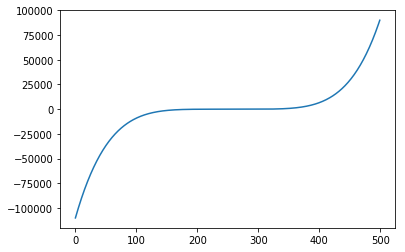

In [92]:
plot(X)

In [94]:
t[0], t[1]

(array([-107484.29556996617, -110000.0], dtype=object),
 array([-105439.9183045063, -107852.63255729293], dtype=object))

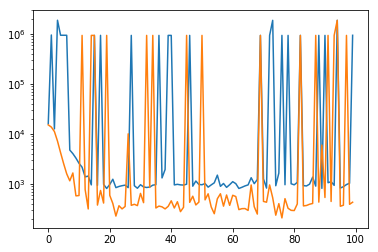

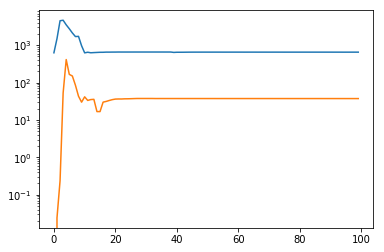

In [89]:
array(u).shape
plot(u[0])
plot(u[1])
yscale('log')
show()

plot(v[0])
plot(v[1])
yscale('log')

In [ ]:
abests.shape, bbests.shape

In [30]:
bbests = array(bbests)[:, 0, :]

# bavgs = array(bavgs)[:, 0, :]

print(bbests.shape, bavgs.shape)

save('bbests', bbests)
save('bavgs', bavgs)

(20,) (20, 100)


In [31]:
bbests

array([7.49199759e+06, 8.21539065e+07, 1.91178874e+11, 2.21900804e+08,
       5.61250495e+07, 3.70679709e+12, 6.07476326e+08, 2.74668908e+11,
       5.84099050e+11, 3.54406686e+07, 2.95089440e+07, 7.05340272e+09,
       5.11420620e+11, 8.53817175e+09, 8.31689859e+07, 2.67354275e+12,
       2.41965447e+09, 1.39095612e+08, 1.33273669e+11, 7.15266930e+07])